
First few rows of the Airline Dataset:
  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North A

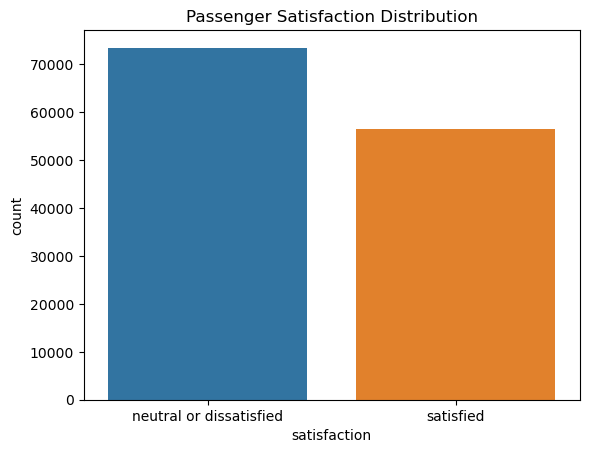


Information about Airline Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71243537 entries, 0 to 71459258
Data columns (total 24 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Gender                             int64 
 1   Age                                int64 
 2   Flight Status                      int64 
 3   Customer Type                      int64 
 4   Type of Travel                     int64 
 5   Class                              int64 
 6   Flight Distance                    int64 
 7   Inflight wifi service              int64 
 8   Departure/Arrival time convenient  int64 
 9   Ease of Online booking             int64 
 10  Gate location                      int64 
 11  Food and drink                     int64 
 12  Online boarding                    int64 
 13  Seat comfort                       int64 
 14  Inflight entertainment             int64 
 15  On-board service                   int64 
 16

In [8]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns


class DataExploration:
    """
    Class for exploring data and displaying insights.
    """
    def __init__(self, airline_data, satisfaction_data):
        self.airline_data = airline_data
        self.satisfaction_data = satisfaction_data

    def display_first_few_rows(self):
        # Display the first few rows for both datasets
        print("\nFirst few rows of the Airline Dataset:")
        print(self.airline_data.head())
        print("\nFirst few rows of the Airline Passenger Satisfaction Dataset:")
        print(self.satisfaction_data.head())

    def display_information(self):
        # Get information about both datasets
        print("\nInformation about Airline Dataset:")
        self.airline_data.info()
        print("\nInformation about Airline Passenger Satisfaction Dataset:")
        self.satisfaction_data.info()

    def display_null_values_summary(self):
        # Check for null values as total for both datasets
        print("\nNull values summary for Airline Dataset:")
        print(self.airline_data.isnull().sum())
        print("\nNull values summary for Airline Passenger Satisfaction Dataset:")
        print(self.satisfaction_data.isnull().sum())

    def display_basic_statistics(self):
        # Display basic summary statistics for both datasets
        print("\nBasic Statistics of Airline Data:")
        print(self.airline_data.describe())
        print("\nBasic Statistics of Passenger Satisfaction Data:")
        print(self.satisfaction_data.describe())

    def visualize_satisfaction_distribution(self):
        # Visualize passenger satisfaction distribution
        sns.countplot(x='satisfaction', data=self.satisfaction_data)
        plt.title('Passenger Satisfaction Distribution')
        plt.show()
        
        
class DataPreprocessing:
    """
    Class for preprocessing data and preparing it for modeling.
    """
    def __init__(self, airline_data, satisfaction_data):
        self.airline_data = airline_data
        self.satisfaction_data = satisfaction_data

    def merge_datasets(self):
        # Merge datasets based on common columns (Gender, Age)
        # Perform an inner join to create a comprehensive dataset
        merged_data = pd.merge(self.airline_data, self.satisfaction_data, on=['Gender', 'Age'], how='inner')
        # Handle missing values
        return merged_data.dropna()

    def drop_unnecessary_columns(self, merged_data):
        # Identify unnecessary columns based on context
        unnecessary_columns = ['Passenger ID', 'First Name', 'Last Name', 'Nationality',
                                'Airport Name', 'Airport Country Code', 'Country Name',
                                'Airport Continent', 'Continents', 'Departure Date',
                                'Arrival Airport', 'Pilot Name', 'Unnamed: 0', 'id']
        # Drop unnecessary columns and return the output
        return merged_data.drop(unnecessary_columns, axis=1)

    def label_encode_categorical_variables(self, merged_data):
        # Label encode categorical variables
        label_encoder = LabelEncoder()
        for column in ['Gender', 'Flight Status', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes']:
            merged_data[column] = label_encoder.fit_transform(merged_data[column])
        return merged_data

    def get_features_and_target(self, merged_data):
        # Separate features and target variable
        X = merged_data.drop('satisfaction', axis=1)
        y = merged_data['satisfaction']
        return X, y

    def label_encode_target_variable(self, y):
        # Label encode target variable
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        return y_encoded

    def display_datasets_info(self, merged_data, X, y):
        # Get information about merged dataset
        print("\nInformation about Airline Dataset:")
        merged_data.info()
        # Get information about Processed Dataset X
        print("\nInformation about Processed Dataset X:")
        X.info()
        # Get information about Processed Dataset y
        print("\nInformation about Processed Dataset y:")
        y.info()
        
        
class ModelDevelopment:
    """
    Class for developing and training the neural network model.
    """
    def __init__(self, X, y_encoded):
        self.X = X
        self.y_encoded = y_encoded

    def split_and_standardize_data(self):
        # Split the data into training and testing sets
        X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(self.X, self.y_encoded, test_size=0.2, random_state=42)
        # Standardize features using StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded

    def build_neural_network(self, input_shape):
        # Build the neural network model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(3, activation='softmax')
        ])
        # Compile the model
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def train_model(self, model, X_train_scaled, y_train_encoded):
        # Train the model
        model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)
        return model

    def evaluate_model(self, model, X_test_scaled, y_test_encoded):
        # Evaluate the model
        accuracy = model.evaluate(X_test_scaled, y_test_encoded)[1]
        return accuracy
    

class ModelEvaluator:
    """
    Class for evaluating the trained model.
    """
    @staticmethod
    def evaluate_model(model, X_test_scaled, y_test):
        """
        Evaluate the model on testing data and print accuracy, confusion matrix, and classification report.

        Parameters:
        - model: Trained neural network model
        - X_test_scaled: Standardized testing features
        - y_test: True labels for testing data
        """
        # Predictions
        y_pred_prob = model.predict(X_test_scaled)
        y_pred = y_pred_prob.argmax(axis=1)

        # Convert predictions back to original labels
        y_pred_labels = pd.Series(y_pred).map({0: 'Satisfied', 1: 'Neutral', 2: 'Dissatisfied'})

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_labels)
        conf_matrix = confusion_matrix(y_test, y_pred_labels)
        classification_rep = classification_report(y_test, y_pred_labels)

        # Print evaluation metrics
        print(f'Model Accuracy: {accuracy}')
        print(f'Confusion Matrix:\n{conf_matrix}')
        print(f'Classification Report:\n{classification_rep}')
        
    
def main():
    # Load datasets
    airline_data = pd.read_csv("airline_dataset.csv")
    satisfaction_data = pd.read_csv("airline_passenger_satisfaction.csv")

    # Task 01: Data Exploration Step
    # Create an instance of DataExploration
    data_exploration = DataExploration(airline_data, satisfaction_data)
    
    # Display the first few rows
    data_exploration.display_first_few_rows()
    
    # Display information about datasets
    data_exploration.display_information()
    
    # Display null values summary
    data_exploration.display_null_values_summary()
    
    # Display basic statistics
    data_exploration.display_basic_statistics()
    
    # Visualize satisfaction distribution
    data_exploration.visualize_satisfaction_distribution()

    # Task 02: Data Pre-processing Step
    # Create an instance of DataPreprocessing
    data_preprocessing = DataPreprocessing(airline_data, satisfaction_data)
    
    # Merge datasets
    merged_data = data_preprocessing.merge_datasets()
    
    # Drop unnecessary columns
    merged_data = data_preprocessing.drop_unnecessary_columns(merged_data)
    
    # Label encode categorical variables
    merged_data = data_preprocessing.label_encode_categorical_variables(merged_data)
    
    # Get features and target variable
    X, y = data_preprocessing.get_features_and_target(merged_data)
    
    # Label encode target variable
    y_encoded = data_preprocessing.label_encode_target_variable(y)
    
    # Display information about datasets
    data_preprocessing.display_datasets_info(merged_data, X, y)

    # Task 03: Model Development
    # Create an instance of ModelDevelopment
    model_development = ModelDevelopment(X, y_encoded)
    
    # Split and standardize data
    X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = model_development.split_and_standardize_data()
    
    # Build the neural network model
    model = model_development.build_neural_network(X_train_scaled.shape[1])
    
    # Train the model
    trained_model = model_development.train_model(model, X_train_scaled, y_train_encoded)
    
    # Evaluate the model
    accuracy = model_development.evaluate_model(trained_model, X_test_scaled, y_test_encoded)

    # Display the accuracy
    print(f'Model Accuracy: {accuracy}')
    
    # Model Evaluation
    # Create an instance of ModelEvaluator
    model_evaluation = ModelEvaluator(airline_data, satisfaction_data)
    model_evaluation.evaluate_model(trained_model, X_test_scaled, y_test_encoded)


if __name__ == '__main__':
    main()
    